In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
# import shutup; shutup.please()
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [97]:
df = pd.read_csv("Данные.csv")
df.head()

,дата,направление,выход
0,30.12.2021,ш,"78,95"
1,29.12.2021,ш,"79,3"
2,28.12.2021,ш,"79,21"
3,27.12.2021,ш,"79,06"
4,24.12.2021,л,"78,69"


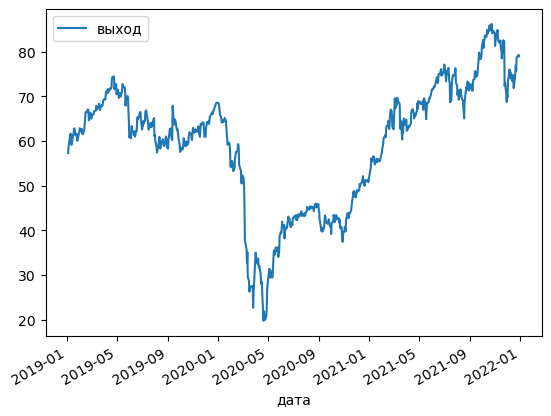

In [98]:
df["выход"] = df["выход"].str.replace(',', '.').astype(float)
df['дата'] = pd.to_datetime(df['дата'], dayfirst=True)
df.plot(x="дата", y="выход")
plt.show()

In [99]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["направление"])
df['направление'] = le.transform(df["направление"])

In [100]:
df = df.iloc[::-1]
df

,дата,направление,выход
748,2019-01-03,0,57.30
747,2019-01-04,0,58.73
746,2019-01-08,0,61.49
745,2019-01-09,1,61.67
744,2019-01-10,1,60.58
...,...,...,...
4,2021-12-24,0,78.69
3,2021-12-27,1,79.06
2,2021-12-28,1,79.21
1,2021-12-29,1,79.30


In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df['выход'], test_size=0.2, shuffle=False)

In [13]:
# Cross-validation for ARIMA
tscv = TimeSeriesSplit(n_splits=5)
arima_errors = []

for train_index, test_index in tscv.split(df):
    train_data, test_data = df.iloc[train_index]['выход'], df.iloc[test_index]['выход']
    
    # Fit ARIMA on train_data
    arima_model = ARIMA(train_data, order=(5, 1, 5))  # Tune (p, d, q) as needed
    arima_result = arima_model.fit()

    # Forecast on the test_data
    arima_forecast = arima_result.forecast(steps=len(test_data))

    # Calculate MAE for this split
    arima_mae = mean_absolute_error(test_data, arima_forecast)
    arima_errors.append(arima_mae)

# Average MAE over all splits
print(f"ARIMA Cross-Validation MAE: {sum(arima_errors) / len(arima_errors)}")


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836

ARIMA Cross-Validation MAE: 9.080358330860776


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cross-validation for ETS
tscv = TimeSeriesSplit(n_splits=5)
ets_errors = []

for train_index, test_index in tscv.split(df):
    train_data, test_data = df.iloc[train_index]['выход'], df.iloc[test_index]['выход']
    
    # Fit ETS on train_data
    ets_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    ets_result = ets_model.fit()

    # Forecast on the test_data
    ets_forecast = ets_result.forecast(steps=len(test_data))

    # Calculate MAE for this split
    ets_mae = mean_absolute_error(test_data, ets_forecast)
    ets_errors.append(ets_mae)

# Average MAE over all splits
print(f"ETS Cross-Validation MAE: {sum(ets_errors) / len(ets_errors)}")


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-pa

ETS Cross-Validation MAE: 10.729460870421024


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Define LSTM Model using PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        batch_size = input_seq.size(0)  # Dynamically get batch size
        hidden_cell = (torch.zeros(1, batch_size, self.hidden_layer_size),
                       torch.zeros(1, batch_size, self.hidden_layer_size))
        
        lstm_out, _ = self.lstm(input_seq, hidden_cell)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Cross-validation for LSTM with TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lstm_errors = []

time_step = 10  # Same as before
input_size = 1  # Single feature: price

for train_index, test_index in tscv.split(df):
    train_data, test_data = df.iloc[train_index]['выход'], df.iloc[test_index]['выход']

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
    
    # Create sequences for LSTM
    X_train, Y_train = create_sequences(train_scaled, time_step)
    
    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add input dimension
    Y_train = torch.tensor(Y_train, dtype=torch.float32)

    # Initialize model
    model = LSTMModel(input_size=input_size, hidden_layer_size=50, output_size=1)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training the model
    model.train()
    epochs = 10
    for epoch in range(epochs):
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = loss_function(y_pred, Y_train.unsqueeze(-1))
        loss.backward()
        optimizer.step()

    # Prepare test data
    test_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))
    X_test, Y_test = create_sequences(test_scaled, time_step)

    # Convert test data to PyTorch tensors
    X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
    
    # Prediction
    model.eval()
    with torch.no_grad():
        lstm_predictions = model(X_test).numpy()

    # Inverse the scaling
    lstm_predictions = scaler.inverse_transform(lstm_predictions)

    # Calculate mae for this split
    lstm_mae = mean_absolute_error(test_data[time_step:], lstm_predictions)
    lstm_errors.append(lstm_mae)

# Average mae over all splits
print(f"LSTM Cross-Validation mae: {sum(lstm_errors) / len(lstm_errors)}")


LSTM Cross-Validation mae: 22.039650573864318


In [19]:
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
arima_errors = []

for train_index, test_index in tscv.split(df['выход']):
    train_data, test_data = df['выход'].iloc[train_index], df['выход'].iloc[test_index]
    
    # Grid search for ARIMA on each train split
    model = pm.auto_arima(train_data, 
                          start_p=1, start_q=1, 
                          max_p=5, max_q=5, 
                          m=1,  # Non-seasonal
                          d=None,  # Automatically determine differencing
                          seasonal=False, 
                          stepwise=True,
                          trace=False,  # Set to True to view progress
                          suppress_warnings=True)

    # Fit the model on the training data
    model.fit(train_data)

    # Predict the next values for the test set
    forecast = model.predict(len(test_data))

    # Calculate mae for this fold
    arima_mae = (mean_absolute_error(test_data, forecast))
    arima_errors.append(arima_mae)

# Average mae across all folds
print(f"ARIMA Cross-Validation mae: {sum(arima_errors) / len(arima_errors)}")


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Cross-Validation mae: 9.209951612903224


/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
import optuna
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Time series cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)

# Define the objective function to minimize
def objective(trial):
    arima_errors = []

    # Sample ARIMA hyperparameters from Optuna
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 5)

    # TimeSeriesSplit cross-validation
    for train_index, test_index in tscv.split(df['выход']):
        train_data, test_data = df['выход'].iloc[train_index], df['выход'].iloc[test_index]
        
        try:
            # Fit ARIMA model with selected hyperparameters
            model = pm.ARIMA(order=(p, d, q), seasonal_order=(0, 0, 0, 0), suppress_warnings=True)
            model.fit(train_data)
            
            # Forecast on the test set
            forecast = model.predict(len(test_data))

            # Calculate mae for this fold
            arima_mae = mean_absolute_error(test_data, forecast)
            arima_errors.append(arima_mae)
        
        except:
            # Return a high error if the model fails to converge
            return np.inf

    # Return the average mae across all splits
    return sum(arima_errors) / len(arima_errors)

# Create the Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f"Best trial parameters: {best_trial.params}")
print(f"Best trial mae: {best_trial.value}")


[I 2024-10-21 18:47:59,311] A new study created in memory with name: no-name-c72ce5ed-1c99-4019-a356-9c29ba9d065c
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/artembritsyn/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported in

Best trial parameters: {'p': 1, 'd': 0, 'q': 0}
Best trial mae: 9.206474630176999


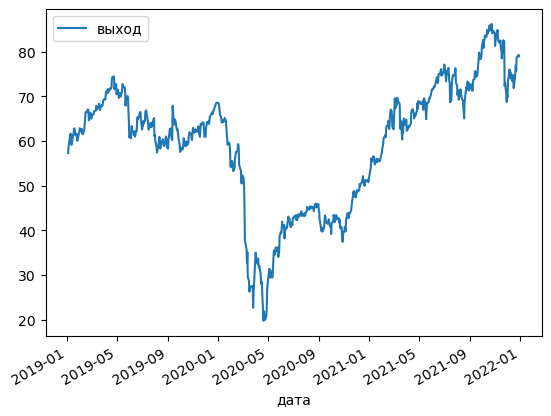

ARIMAX Cross-Validation MAE: 8.535544253997417
ARIMAX Cross-Validation F1 Score: 0.4667097164350683


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, f1_score
from statsmodels.tsa.arima.model import ARIMA

df.plot(x="дата", y="выход")
plt.show()

tscv = TimeSeriesSplit(n_splits=5)
arima_errors = []
f1_scores = []

exog = df[['day_of_week', 'month', 'year']]

for train_index, test_index in tscv.split(df):
    train_data, test_data = df.iloc[train_index]['выход'], df.iloc[test_index]['выход']
    exog_train, exog_test = exog.iloc[train_index], exog.iloc[test_index]

    arima_model = ARIMA(train_data, exog=exog_train, order=(5, 1, 5))  # Tune (p, d, q) as needed
    arima_result = arima_model.fit()

    arima_forecast = arima_result.forecast(steps=len(test_data), exog=exog_test)


    arima_mae = mean_absolute_error(test_data, arima_forecast)
    arima_errors.append(arima_mae)
    
    test_actual = df.iloc[test_index]['направление'].values  
    test_pred = (np.roll(arima_forecast, -1) > arima_forecast).astype(int) 

    f1 = f1_score(test_actual[:-1], test_pred[:-1])  
    f1_scores.append(f1)

print(f"ARIMAX Cross-Validation MAE: {sum(arima_errors) / len(arima_errors)}")

print(f"ARIMAX Cross-Validation F1 Score: {sum(f1_scores) / len(f1_scores)}")


In [33]:
def add_increasing_column(df, value_column, new_column_name='направление'):
    df[new_column_name] = (df[value_column].shift(-1) > df[value_column]).astype(int)
    return df

,дата,направление,выход,day_of_week,month,year
39,2022-02-25,0,79.792323,4,2,2022
38,2022-02-24,1,79.783576,3,2,2022
37,2022-02-23,0,79.796602,2,2,2022
36,2022-02-22,1,79.742766,1,2,2022
35,2022-02-21,1,79.824224,0,2,2022


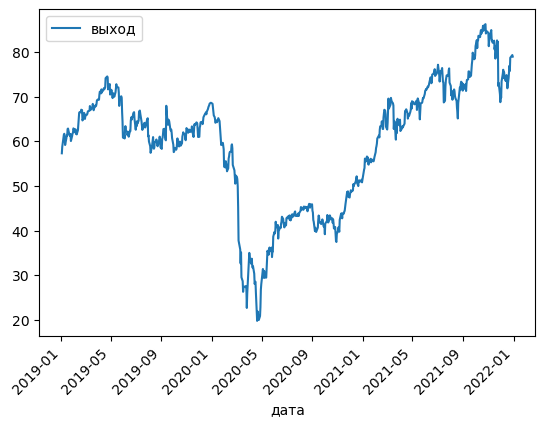

Evaluating ARIMA(1,0,1)...
ARIMA(1,0,1) failed due to A constant trend was included in the model specification, but the `exog` data already contains a column of constants.
ARIMA(1,0,1) - Average MAE: 16.240517018840222, Average F1 Score: 0.2644897236002835
Evaluating ARIMA(1,0,3)...
ARIMA(1,0,3) failed due to A constant trend was included in the model specification, but the `exog` data already contains a column of constants.
ARIMA(1,0,3) - Average MAE: 16.490788905856686, Average F1 Score: 0.2520348091657061
Evaluating ARIMA(1,0,5)...
ARIMA(1,0,5) failed due to A constant trend was included in the model specification, but the `exog` data already contains a column of constants.
ARIMA(1,0,5) - Average MAE: 16.382953280351806, Average F1 Score: 0.27521575563757433
Evaluating ARIMA(1,0,8)...
ARIMA(1,0,8) failed due to A constant trend was included in the model specification, but the `exog` data already contains a column of constants.
ARIMA(1,0,8) - Average MAE: 17.491321544823787, Average 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, f1_score
from statsmodels.tsa.arima.model import ARIMA

# Plot the data
df.plot(x="дата", y="выход")
plt.xticks(rotation=45)
plt.show()


df['day_of_week'] = df['дата'].dt.dayofweek
df['month'] = df['дата'].dt.month
df['year'] = df['дата'].dt.year

# Hyperparameter search space
p_values = [1, 3, 5, 8, 10, 15, 20] 
d_values = [0, 1]  
q_values = [1, 3, 5, 8, 10]  

best_p, best_d, best_q = None, None, None
best_mae = float('inf')
best_f1 = float('-inf') 

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            print(f"Evaluating ARIMA({p},{d},{q})...")
            
            tscv = TimeSeriesSplit(n_splits=5)
            arima_errors = []
            f1_scores = []
            
            exog = df[['day_of_week', 'month', 'year']]
            
            for train_index, test_index in tscv.split(df):
                train_data, test_data = df.iloc[train_index]['выход'], df.iloc[test_index]['выход']
                exog_train, exog_test = exog.iloc[train_index], exog.iloc[test_index]

                try:
                    arima_model = ARIMA(train_data, exog=exog_train, order=(p, d, q))
                    arima_result = arima_model.fit()


                    arima_forecast = arima_result.forecast(steps=len(test_data), exog=exog_test)

                    arima_mae = mean_absolute_error(test_data, arima_forecast)
                    arima_errors.append(arima_mae)


                    test_actual = df.iloc[test_index]['направление'].values 
                    test_pred = (np.roll(arima_forecast, -1) > arima_forecast).astype(int)

                    # Calculate F1 score for this split
                    f1 = f1_score(test_actual[:-1], test_pred[:-1])
                    f1_scores.append(f1)

                except Exception as e:
                    print(f"ARIMA({p},{d},{q}) failed due to {e}")
                    continue

            # Average MAE and F1 score over all splits
            avg_mae = sum(arima_errors) / len(arima_errors)
            avg_f1 = sum(f1_scores) / len(f1_scores)

            print(f"ARIMA({p},{d},{q}) - Average MAE: {avg_mae}, Average F1 Score: {avg_f1}")

            # Update best model based on MAE
            if avg_mae < best_mae:
                best_mae = avg_mae
                best_f1 = avg_f1
                best_p, best_d, best_q = p, d, q

# Print the best model results
print(f"\nBest ARIMA model: ARIMA({best_p},{best_d},{best_q})")
print(f"Best MAE: {best_mae}")
print(f"Best F1 Score: {best_f1}")


In [105]:
arima_model = ARIMA(df['выход'], exog=exog, order=(5, 1, 3))
arima_result = arima_model.fit()

df_test = pd.read_csv("Данные_2.csv")

df_test['дата'] = pd.to_datetime(df_test['дата'], dayfirst=True)
df_test = df_test.iloc[::-1]
df_test['day_of_week'] = df_test['дата'].dt.dayofweek
df_test['month'] = df_test['дата'].dt.month
df_test['year'] = df_test['дата'].dt.year

df_test['выход'] = arima_result.forecast(
    steps=df_test.shape[0],
    exog=df_test[['day_of_week', 'month', 'year']]
).values
add_increasing_column(df_test, 'выход', new_column_name='направление')

df_test.head()

,дата,направление,выход,day_of_week,month,year
39,2022-02-25,0,81.083151,4,2,2022
38,2022-02-24,1,80.873067,3,2,2022
37,2022-02-23,0,81.132065,2,2,2022
36,2022-02-22,1,80.887343,1,2,2022
35,2022-02-21,0,81.157228,0,2,2022


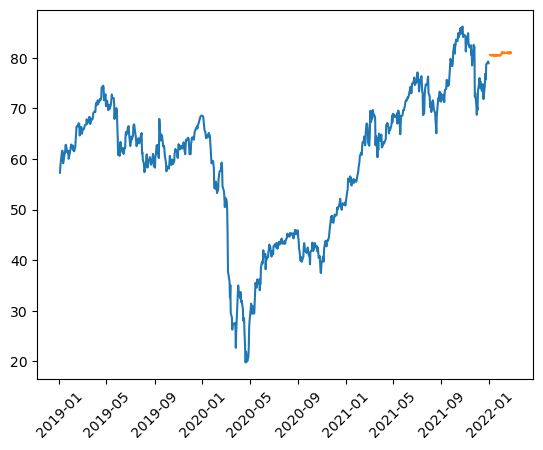

In [106]:
plt.plot(df["дата"], df["выход"])
plt.plot(df_test["дата"], df_test["выход"])
plt.xticks(rotation=45)
plt.show()

In [107]:
forecast_value = df_test['выход'].tolist()

In [108]:
forecast_value

[81.0831513074445,
 80.87306696519954,
 81.13206527153488,
 80.8873429136147,
 81.15722782227931,
 80.86252094040174,
 81.08872066584445,
 80.9289209057224,
 81.06704604658626,
 81.01074795873137,
 80.96848319789024,
 81.02906811030334,
 80.93973025404557,
 81.1057071050509,
 80.92538558696651,
 81.09602153590276,
 80.86684967413566,
 81.12805342547472,
 80.90193499944507,
 80.64569446529276,
 80.40608559158136,
 80.56306584101003,
 80.48279705975256,
 80.53542016878237,
 80.56596251667179,
 80.44019293238671,
 80.57648278861234,
 80.42325564167731,
 80.6379513483389,
 80.42659901729894,
 80.60902676218393,
 80.38780919216697,
 80.62186948724775,
 80.44049937587079,
 80.6126558692049,
 80.44465240073805,
 80.52217954066873,
 80.52489153368333,
 80.49548724133456,
 80.60270307675455]